**FILL THIS SECTION BY YOUR NAME AND STUDENT CODE** : 

- NAME : Mohammad Hadi Kamali
- STUDENT CODE : 401443125

In [57]:
import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

### Read Dataset

Read the dataset in this section.

In [58]:
heart = pd.read_csv("C:/Users/GwT-8/Desktop/New folder 2/prac2_data/heart.csv")
print ("Dataset Length: ", len(heart))
print ("Dataset Shape: ", heart.shape)
heart

Dataset Length:  303
Dataset Shape:  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Prepare Dataset

First of all, search for missing values in the dataset. if there are missing values, handle them however you want.

In [59]:
heart.isin(['-9.0']).any() 
var = -9.0
for col in list(heart):
    try:    
        heart[col] == var
        heart[heart[col] == var] = 'null'
    except TypeError:
        continue
heart.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Then, read the dataset catalog. There are some categorical features with the "int" type. Encode these features so that you can distinguish between numerical and categorical features.

In [60]:
heart = pd.get_dummies(heart,drop_first=True)
heart

C:\Users\GwT-8\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,age_34,age_35,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
299,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
301,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### Declare feature vector and target variable

Here, you are supposed to convert pandas data frame into feature vectors and target variables

In [61]:
feature_cols = list(heart.columns)
feature_cols = feature_cols[ : -1] 
X = heart[feature_cols]
y = heart.target_1
X,y

(     age_34  age_35  age_37  age_38  age_39  age_40  age_41  age_42  age_43  \
 0         0       0       0       0       0       0       0       0       0   
 1         0       0       1       0       0       0       0       0       0   
 2         0       0       0       0       0       0       1       0       0   
 3         0       0       0       0       0       0       0       0       0   
 4         0       0       0       0       0       0       0       0       0   
 ..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
 298       0       0       0       0       0       0       0       0       0   
 299       0       0       0       0       0       0       0       0       0   
 300       0       0       0       0       0       0       0       0       0   
 301       0       0       0       0       0       0       0       0       0   
 302       0       0       0       0       0       0       0       0       0   
 
      age_44  ...  oldpeak_6.2  slope_

### Split data into separate training and test set

Now it's time to split X and y into separate training and test set. You can use the sklearn library for this section.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X, y, X_train, X_test, y_train, y_test

(     age_34  age_35  age_37  age_38  age_39  age_40  age_41  age_42  age_43  \
 0         0       0       0       0       0       0       0       0       0   
 1         0       0       1       0       0       0       0       0       0   
 2         0       0       0       0       0       0       1       0       0   
 3         0       0       0       0       0       0       0       0       0   
 4         0       0       0       0       0       0       0       0       0   
 ..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
 298       0       0       0       0       0       0       0       0       0   
 299       0       0       0       0       0       0       0       0       0   
 300       0       0       0       0       0       0       0       0       0   
 301       0       0       0       0       0       0       0       0       0   
 302       0       0       0       0       0       0       0       0       0   
 
      age_44  ...  oldpeak_6.2  slope_

## Implement desicion tree algorithm

In this cell, you are going to implement your decision tree. Feel free to add more arguments to functions or add your desired functions.

In [71]:
class TreeNode:
    def __init__(self, data,output):
        self.data = data
        self.children = {}
        self.output = output
        self.index = -1
        
    def add_child(self,feature_value,obj):
        self.children[feature_value] = obj


###############################################################
class DecisionTreeClassifier:
    def __init__(self):
        self.__root = None

    def __count_unique(self,Y):
        d = {}
        for i in Y:
            if i not in d:
                d[i]=1
            else:
                d[i]+=1
        return d


    def __entropy(self,Y):
        freq_map = self.__count_unique(Y)
        entropy_ = 0
        total = len(Y)
        for i in freq_map:
            p = freq_map[i]/total
            entropy_ += (-p)*math.log2(p)
        return entropy_

    def __gain_ratio(self,X,Y,selected_feature):
        info_orig = self.__entropy(Y) 
        info_f = 0 
        split_info = 0
        values = set(X[:,selected_feature])
        df = pd.DataFrame(X)
        df[df.shape[1]] = Y
        initial_size = df.shape[0] 
        for i in values:
            df1 = df[df[selected_feature] == i]
            current_size = df1.shape[0]
            info_f += (current_size/initial_size)*self.__entropy(df1[df1.shape[1]-1])
            split_info += (-current_size/initial_size)*math.log2(current_size/initial_size)

        if split_info == 0 :
            return math.inf

        info_gain = info_orig - info_f
        gain_ratio = info_gain / split_info
        return gain_ratio

    def __gini_index(self,Y):
        freq_map = self.__count_unique(Y)
        gini_index_ = 1
        total = len(Y)
        for i in freq_map:
            p = freq_map[i]/total
            gini_index_ -= p**2
        return gini_index_

    def __gini_gain(self,X,Y,selected_feature):
        gini_orig = self.__gini_index(Y)
        gini_split_f = 0 
        values = set(X[:,selected_feature])
        df = pd.DataFrame(X)
        df[df.shape[1]] = pd.Series(Y)
        df = df.interpolate(method ='linear', limit_direction ='forward')
        initial_size = df.shape[0] 
        for i in values:
            df1 = df[df[selected_feature] == i]
            current_size = df1.shape[0]
            gini_split_f += (current_size/initial_size)*self.__gini_index(df1[df1.shape[1]-1])

        gini_gain_ = gini_orig - gini_split_f
        return gini_gain_


    def __decision_tree(self,X,Y,features,level,metric,classes):
        if len(set(Y)) == 1:
            print("Level",level)
            output = None
            for i in classes:
                if i in Y:
                    output = i
                    print("Count of",i,"=",len(Y))
                else :
                    print("Count of",i,"=",0)
            if metric == "gain_ratio":
                print("Current Entropy is =  0.0")
            elif metric == "gini_index":
                print("Current Gini Index is =  0.0")

            print("Reached leaf Node")
            print()
            return TreeNode(None,output)

        if len(features) == 0:
            print("Level",level)
            freq_map = self.__count_unique(Y)
            output = None
            max_count = -math.inf
            for i in classes:
                if i not in freq_map:
                    print("Count of",i,"=",0)
                else :
                    if freq_map[i] > max_count :
                        output = i
                        max_count = freq_map[i]
                    print("Count of",i,"=",freq_map[i])

            if metric == "gain_ratio":
                print("Current Entropy  is =",self.__entropy(Y))
            elif metric == "gini_index":
                print("Current Gini Index is =",self.__gini_index(Y))            

            print("Reached leaf Node")
            print()
            return TreeNode(None,output)

        max_gain = -math.inf
        final_feature = None
        for f in features :
            if metric == "gain_ratio":
                current_gain = self.__gain_ratio(X,Y,f)
            elif metric =="gini_index":
                current_gain = self.__gini_gain(X,Y,f)

            if current_gain > max_gain:
                max_gain = current_gain
                final_feature = f

        print("Level",level)
        freq_map = self.__count_unique(Y)
        output = None
        max_count = -math.inf

        for i in classes:
            if i not in freq_map:
                print("Count of",i,"=",0)
            else :
                if freq_map[i] > max_count :
                    output = i
                    max_count = freq_map[i]
                print("Count of",i,"=",freq_map[i])

        if metric == "gain_ratio" :        
            print("Current Entropy is =",self.__entropy(Y))
            print("Splitting on feature  X[",final_feature,"] with gain ratio ",max_gain,sep="")
            print()
        elif metric == "gini_index":
            print("Current Gini Index is =",self.__gini_index(Y))
            print("Splitting on feature  X[",final_feature,"] with gini gain ",max_gain,sep="")
            print()

            
        unique_values = set(X[:,final_feature])
        df = pd.DataFrame(X)
        df[df.shape[1]] = pd.Series(Y)
        df = df.interpolate(method ='linear', limit_direction ='forward')
        current_node = TreeNode(final_feature,output)
        index  = features.index(final_feature)
        features.remove(final_feature)
        for i in unique_values:
            df1 = df[df[final_feature] == i]
            node = self.__decision_tree(df1.iloc[:,0:df1.shape[1]-1].values,df1.iloc[:,df1.shape[1]-1].values,features,level+1,metric,classes)
            current_node.add_child(i,node)

        features.insert(index,final_feature)

        return current_node
    
    def fit(self,X,Y,metric="gain_ratio"):
        features = [i for i in range(len(X[0]))]
        classes = set(Y)
        level = 0
        if metric != "gain_ratio" :
            if metric != "gini_index":
                metric="gain_ratio"
        self.__root = self.__decision_tree(X,Y,features,level,metric,classes)
        
    def __predict_for(self,data,node):
        if len(node.children) == 0 :
            return node.output
        val = data[node.data]
        if val not in node.children :
            return node.output
        return self.__predict_for(data,node.children[val])

    def predict(self,X):
        Y = np.array([0 for i in range(len(X))])
        for i in range(len(X)):
            Y[i] = self.__predict_for(X[i],self.__root)
        return Y
    
    def score(self,X,Y):
        Y_pred = self.predict(X)
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y[i]:
                count+=1
        return count/len(Y_pred)

### Part 1 : Compare Gini and Entropy 

In [72]:
X = np.array(X)
Y = np.array(y)
for i in range(len(X)):
    for j in range(len(X[0])):
        X[i][j] = int(X[i][j])

############# Gini:        
clf2 = DecisionTreeClassifier()
clf2.fit(X,Y,metric='gini_index')

        
############# Entropy:
clf1 = DecisionTreeClassifier()
clf1.fit(X,y)

Level 0
Count of 0 = 138
Count of 1 = 165
Current Gini Index is = 0.4960298009999019
Splitting on feature  X[383] with gini gain 0.1379363010334248

Level 1
Count of 0 = 102
Count of 1 = 35
Current Gini Index is = 0.3804145132931962
Splitting on feature  X[336] with gini gain 0.04585841221106224

Level 2
Count of 0 = 41
Count of 1 = 28
Current Gini Index is = 0.4822516278092838
Splitting on feature  X[379] with gini gain 0.05582077543885894

Level 3
Count of 0 = 31
Count of 1 = 28
Current Gini Index is = 0.4987072680264291
Splitting on feature  X[378] with gini gain 0.07939550634178622

Level 4
Count of 0 = 18
Count of 1 = 26
Current Gini Index is = 0.4834710743801651
Splitting on feature  X[380] with gini gain 0.0699068608159516

Level 5
Count of 0 = 11
Count of 1 = 24
Current Gini Index is = 0.43102040816326526
Splitting on feature  X[13] with gini gain 0.05699443413729122

Level 6
Count of 0 = 9
Count of 1 = 24
Current Gini Index is = 0.39669421487603307
Splitting on feature  X[4] w

Level 6
Count of 0 = 6
Count of 1 = 14
Current Gini Index is = 0.42000000000000004
Splitting on feature  X[42] with gini gain 0.18000000000000005

Level 7
Count of 0 = 6
Count of 1 = 4
Current Gini Index is = 0.48
Splitting on feature  X[6] with gini gain 0.08000000000000002

Level 8
Count of 0 = 6
Count of 1 = 3
Current Gini Index is = 0.4444444444444444
Splitting on feature  X[34] with gini gain 0.1111111111111111

Level 9
Count of 0 = 6
Count of 1 = 2
Current Gini Index is = 0.375
Splitting on feature  X[63] with gini gain 0.16071428571428567

Level 10
Count of 0 = 6
Count of 1 = 1
Current Gini Index is = 0.24489795918367352
Splitting on feature  X[67] with gini gain 0.24489795918367352

Level 11
Count of 0 = 6
Count of 1 = 0
Current Gini Index is =  0.0
Reached leaf Node

Level 11
Count of 0 = 0
Count of 1 = 1
Current Gini Index is =  0.0
Reached leaf Node

Level 10
Count of 0 = 0
Count of 1 = 1
Current Gini Index is =  0.0
Reached leaf Node

Level 9
Count of 0 = 0
Count of 1 = 1
C

Level 37
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[137] with gain ratio inf

Level 38
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[144] with gain ratio inf

Level 39
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[157] with gain ratio inf

Level 40
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[158] with gain ratio inf

Level 41
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[159] with gain ratio inf

Level 42
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[163] with gain ratio inf

Level 43
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[165] with gain ratio inf

Level 44
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.81984018168

Level 100
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[330] with gain ratio inf

Level 101
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[332] with gain ratio inf

Level 102
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[335] with gain ratio inf

Level 103
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[343] with gain ratio inf

Level 104
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[347] with gain ratio inf

Level 105
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[349] with gain ratio inf

Level 106
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.8198401816892393
Splitting on feature  X[368] with gain ratio inf

Level 107
Count of 0 = 102
Count of 1 = 35
Current Entropy is = 0.819

Level 159
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[13] with gain ratio inf

Level 160
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[14] with gain ratio inf

Level 161
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[15] with gain ratio inf

Level 162
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[17] with gain ratio inf

Level 163
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[18] with gain ratio inf

Level 164
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[19] with gain ratio inf

Level 165
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[20] with gain ratio inf

Level 166
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feat

Level 223
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[125] with gain ratio inf

Level 224
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[126] with gain ratio inf

Level 225
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[127] with gain ratio inf

Level 226
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[128] with gain ratio inf

Level 227
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[134] with gain ratio inf

Level 228
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[139] with gain ratio inf

Level 229
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[140] with gain ratio inf

Level 230
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting 

Level 287
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[256] with gain ratio inf

Level 288
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[257] with gain ratio inf

Level 289
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[258] with gain ratio inf

Level 290
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[259] with gain ratio inf

Level 291
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[260] with gain ratio inf

Level 292
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[261] with gain ratio inf

Level 293
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[265] with gain ratio inf

Level 294
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting 

Level 356
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[369] with gain ratio inf

Level 357
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[371] with gain ratio inf

Level 358
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[372] with gain ratio inf

Level 359
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[373] with gain ratio inf

Level 360
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[374] with gain ratio inf

Level 361
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[375] with gain ratio inf

Level 362
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting on feature  X[376] with gain ratio inf

Level 363
Count of 0 = 2
Count of 1 = 1
Current Entropy is = 0.9182958340544896
Splitting 

Level 202
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[83] with gain ratio inf

Level 203
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[84] with gain ratio inf

Level 204
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[85] with gain ratio inf

Level 205
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[89] with gain ratio inf

Level 206
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[90] with gain ratio inf

Level 207
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[91] with gain ratio inf

Level 208
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[92] with gain ratio inf

Level 209
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[97] with gain ratio inf

Level 210
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X

Level 275
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[231] with gain ratio inf

Level 276
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[233] with gain ratio inf

Level 277
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[235] with gain ratio inf

Level 278
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[239] with gain ratio inf

Level 279
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[240] with gain ratio inf

Level 280
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[243] with gain ratio inf

Level 281
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[244] with gain ratio inf

Level 282
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[245] with gain ratio inf

Level 283
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 349
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[356] with gain ratio inf

Level 350
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[357] with gain ratio inf

Level 351
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[359] with gain ratio inf

Level 352
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[360] with gain ratio inf

Level 353
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[361] with gain ratio inf

Level 354
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[362] with gain ratio inf

Level 355
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[363] with gain ratio inf

Level 356
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[364] with gain ratio inf

Level 357
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 191
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[66] with gain ratio inf

Level 192
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[67] with gain ratio inf

Level 193
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[69] with gain ratio inf

Level 194
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[71] with gain ratio inf

Level 195
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[72] with gain ratio inf

Level 196
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[73] with gain ratio inf

Level 197
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[74] with gain ratio inf

Level 198
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[75] with gain ratio inf

Level 199
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X

Level 264
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[204] with gain ratio inf

Level 265
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[206] with gain ratio inf

Level 266
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[209] with gain ratio inf

Level 267
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[210] with gain ratio inf

Level 268
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[211] with gain ratio inf

Level 269
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[215] with gain ratio inf

Level 270
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[217] with gain ratio inf

Level 271
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[219] with gain ratio inf

Level 272
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 337
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[334] with gain ratio inf

Level 338
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[337] with gain ratio inf

Level 339
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[338] with gain ratio inf

Level 340
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[339] with gain ratio inf

Level 341
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[341] with gain ratio inf

Level 342
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[342] with gain ratio inf

Level 343
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[344] with gain ratio inf

Level 344
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[345] with gain ratio inf

Level 345
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 178
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[44] with gain ratio inf

Level 179
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[51] with gain ratio inf

Level 180
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[52] with gain ratio inf

Level 181
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[53] with gain ratio inf

Level 182
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[55] with gain ratio inf

Level 183
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[56] with gain ratio inf

Level 184
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[57] with gain ratio inf

Level 185
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[59] with gain ratio inf

Level 186
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X

Level 251
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[181] with gain ratio inf

Level 252
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[184] with gain ratio inf

Level 253
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[186] with gain ratio inf

Level 254
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[187] with gain ratio inf

Level 255
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[189] with gain ratio inf

Level 256
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[190] with gain ratio inf

Level 257
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[193] with gain ratio inf

Level 258
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[195] with gain ratio inf

Level 259
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 326
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[305] with gain ratio inf

Level 327
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[306] with gain ratio inf

Level 328
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[307] with gain ratio inf

Level 329
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[309] with gain ratio inf

Level 330
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[310] with gain ratio inf

Level 331
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[314] with gain ratio inf

Level 332
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[315] with gain ratio inf

Level 333
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[317] with gain ratio inf

Level 334
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 161
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[23] with gain ratio inf

Level 162
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[24] with gain ratio inf

Level 163
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[25] with gain ratio inf

Level 164
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[26] with gain ratio inf

Level 165
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[27] with gain ratio inf

Level 166
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[28] with gain ratio inf

Level 167
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[29] with gain ratio inf

Level 168
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[30] with gain ratio inf

Level 169
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X

Level 233
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[153] with gain ratio inf

Level 234
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[155] with gain ratio inf

Level 235
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[156] with gain ratio inf

Level 236
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[160] with gain ratio inf

Level 237
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[162] with gain ratio inf

Level 238
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[164] with gain ratio inf

Level 239
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[167] with gain ratio inf

Level 240
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[168] with gain ratio inf

Level 241
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 307
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[282] with gain ratio inf

Level 308
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[283] with gain ratio inf

Level 309
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[284] with gain ratio inf

Level 310
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[286] with gain ratio inf

Level 311
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[287] with gain ratio inf

Level 312
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[288] with gain ratio inf

Level 313
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[289] with gain ratio inf

Level 314
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[290] with gain ratio inf

Level 315
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 144
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[6] with gain ratio inf

Level 145
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[7] with gain ratio inf

Level 146
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[8] with gain ratio inf

Level 147
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[9] with gain ratio inf

Level 148
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[10] with gain ratio inf

Level 149
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[11] with gain ratio inf

Level 150
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[13] with gain ratio inf

Level 151
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[14] with gain ratio inf

Level 152
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[15]

Level 216
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[121] with gain ratio inf

Level 217
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[123] with gain ratio inf

Level 218
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[125] with gain ratio inf

Level 219
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[126] with gain ratio inf

Level 220
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[127] with gain ratio inf

Level 221
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[128] with gain ratio inf

Level 222
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[129] with gain ratio inf

Level 223
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[134] with gain ratio inf

Level 224
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 289
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[259] with gain ratio inf

Level 290
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[260] with gain ratio inf

Level 291
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[261] with gain ratio inf

Level 292
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[265] with gain ratio inf

Level 293
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[267] with gain ratio inf

Level 294
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[268] with gain ratio inf

Level 295
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[269] with gain ratio inf

Level 296
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[270] with gain ratio inf

Level 297
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 362
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[374] with gain ratio inf

Level 363
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[375] with gain ratio inf

Level 364
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[377] with gain ratio inf

Level 365
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[378] with gain ratio inf

Level 366
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[380] with gain ratio inf

Level 367
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[381] with gain ratio inf

Level 368
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[382] with gain ratio inf

Level 369
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[384] with gain ratio inf

Level 370
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 195
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[83] with gain ratio inf

Level 196
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[84] with gain ratio inf

Level 197
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[85] with gain ratio inf

Level 198
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[88] with gain ratio inf

Level 199
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[89] with gain ratio inf

Level 200
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[90] with gain ratio inf

Level 201
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[91] with gain ratio inf

Level 202
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feat

Level 260
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[209] with gain ratio inf

Level 261
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[210] with gain ratio inf

Level 262
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[211] with gain ratio inf

Level 263
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[215] with gain ratio inf

Level 264
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[217] with gain ratio inf

Level 265
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[219] with gain ratio inf

Level 266
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[220] with gain ratio inf

Level 267
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting 

Level 327
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[317] with gain ratio inf

Level 328
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[324] with gain ratio inf

Level 329
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[325] with gain ratio inf

Level 330
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[334] with gain ratio inf

Level 331
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[336] with gain ratio inf

Level 332
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[337] with gain ratio inf

Level 333
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[338] with gain ratio inf

Level 334
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting 

Level 156
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[23] with gain ratio inf

Level 157
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[24] with gain ratio inf

Level 158
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[25] with gain ratio inf

Level 159
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[26] with gain ratio inf

Level 160
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[28] with gain ratio inf

Level 161
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[30] with gain ratio inf

Level 162
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[31] with gain ratio inf

Level 163
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feat

Level 220
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[141] with gain ratio inf

Level 221
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[145] with gain ratio inf

Level 222
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[146] with gain ratio inf

Level 223
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[147] with gain ratio inf

Level 224
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[150] with gain ratio inf

Level 225
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[151] with gain ratio inf

Level 226
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[152] with gain ratio inf

Level 227
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting 

Level 284
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[258] with gain ratio inf

Level 285
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[259] with gain ratio inf

Level 286
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[260] with gain ratio inf

Level 287
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[261] with gain ratio inf

Level 288
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[265] with gain ratio inf

Level 289
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[267] with gain ratio inf

Level 290
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[268] with gain ratio inf

Level 291
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting 

Splitting on feature  X[363] with gain ratio inf

Level 351
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[364] with gain ratio inf

Level 352
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[365] with gain ratio inf

Level 353
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[366] with gain ratio inf

Level 354
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[367] with gain ratio inf

Level 355
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[369] with gain ratio inf

Level 356
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[370] with gain ratio inf

Level 357
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[371] with gain ratio inf

Level 358
Count of 0 = 1
Count of 1 = 2


Level 181
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[66] with gain ratio inf

Level 182
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[67] with gain ratio inf

Level 183
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[69] with gain ratio inf

Level 184
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[71] with gain ratio inf

Level 185
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[72] with gain ratio inf

Level 186
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[73] with gain ratio inf

Level 187
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[74] with gain ratio inf

Level 188
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feat

Level 246
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[184] with gain ratio inf

Level 247
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[186] with gain ratio inf

Level 248
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[187] with gain ratio inf

Level 249
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[189] with gain ratio inf

Level 250
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[190] with gain ratio inf

Level 251
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[193] with gain ratio inf

Level 252
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[195] with gain ratio inf

Level 253
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting 

Level 312
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[291] with gain ratio inf

Level 313
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[294] with gain ratio inf

Level 314
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[298] with gain ratio inf

Level 315
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[299] with gain ratio inf

Level 316
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[300] with gain ratio inf

Level 317
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[301] with gain ratio inf

Level 318
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[302] with gain ratio inf

Level 319
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting 

Level 115
Count of 0 = 0
Count of 1 = 2
Current Entropy is =  0.0
Reached leaf Node

Level 112
Count of 0 = 0
Count of 1 = 2
Current Entropy is =  0.0
Reached leaf Node

Level 111
Count of 0 = 0
Count of 1 = 2
Current Entropy is =  0.0
Reached leaf Node

Level 109
Count of 0 = 0
Count of 1 = 2
Current Entropy is =  0.0
Reached leaf Node

Level 108
Count of 0 = 0
Count of 1 = 2
Current Entropy is =  0.0
Reached leaf Node

Level 1
Count of 0 = 36
Count of 1 = 130
Current Entropy is = 0.7544062039636578
Splitting on feature  X[5] with gain ratio inf

Level 2
Count of 0 = 36
Count of 1 = 130
Current Entropy is = 0.7544062039636578
Splitting on feature  X[45] with gain ratio inf

Level 3
Count of 0 = 36
Count of 1 = 130
Current Entropy is = 0.7544062039636578
Splitting on feature  X[53] with gain ratio inf

Level 4
Count of 0 = 36
Count of 1 = 130
Current Entropy is = 0.7544062039636578
Splitting on feature  X[55] with gain ratio inf

Level 5
Count of 0 = 36
Count of 1 = 130
Current Entropy

Level 61
Count of 0 = 36
Count of 1 = 130
Current Entropy is = 0.7544062039636578
Splitting on feature  X[246] with gain ratio inf

Level 62
Count of 0 = 36
Count of 1 = 130
Current Entropy is = 0.7544062039636578
Splitting on feature  X[247] with gain ratio inf

Level 63
Count of 0 = 36
Count of 1 = 130
Current Entropy is = 0.7544062039636578
Splitting on feature  X[248] with gain ratio inf

Level 64
Count of 0 = 36
Count of 1 = 130
Current Entropy is = 0.7544062039636578
Splitting on feature  X[250] with gain ratio inf

Level 65
Count of 0 = 36
Count of 1 = 130
Current Entropy is = 0.7544062039636578
Splitting on feature  X[251] with gain ratio inf

Level 66
Count of 0 = 36
Count of 1 = 130
Current Entropy is = 0.7544062039636578
Splitting on feature  X[252] with gain ratio inf

Level 67
Count of 0 = 36
Count of 1 = 130
Current Entropy is = 0.7544062039636578
Splitting on feature  X[253] with gain ratio inf

Level 68
Count of 0 = 36
Count of 1 = 130
Current Entropy is = 0.75440620396

Level 122
Count of 0 = 16
Count of 1 = 130
Current Entropy is = 0.4986751363204344
Splitting on feature  X[367] with gain ratio inf

Level 123
Count of 0 = 16
Count of 1 = 130
Current Entropy is = 0.4986751363204344
Splitting on feature  X[230] with gain ratio 0.37448869126188533

Level 124
Count of 0 = 15
Count of 1 = 130
Current Entropy is = 0.4798320236161285
Splitting on feature  X[231] with gain ratio 0.3849355911365821

Level 125
Count of 0 = 14
Count of 1 = 130
Current Entropy is = 0.460127886147135
Splitting on feature  X[254] with gain ratio 0.39620182773866164

Level 126
Count of 0 = 13
Count of 1 = 130
Current Entropy is = 0.4394969869215134
Splitting on feature  X[264] with gain ratio 0.40841403906606805

Level 127
Count of 0 = 12
Count of 1 = 130
Current Entropy is = 0.4178642624458584
Splitting on feature  X[271] with gain ratio 0.42173056403915354

Level 128
Count of 0 = 11
Count of 1 = 130
Current Entropy is = 0.39514310063489744
Splitting on feature  X[277] with gain r

Level 184
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[51] with gain ratio inf

Level 185
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[52] with gain ratio inf

Level 186
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[54] with gain ratio inf

Level 187
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[56] with gain ratio inf

Level 188
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[58] with gain ratio inf

Level 189
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[60] with gain ratio inf

Level 190
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[61] with gain ratio inf

Level 191
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feat

Level 249
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[168] with gain ratio inf

Level 250
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[169] with gain ratio inf

Level 251
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[171] with gain ratio inf

Level 252
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[172] with gain ratio inf

Level 253
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[173] with gain ratio inf

Level 254
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[174] with gain ratio inf

Level 255
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[175] with gain ratio inf

Level 256
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting 

Level 315
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[301] with gain ratio inf

Level 316
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[302] with gain ratio inf

Level 317
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[303] with gain ratio inf

Level 318
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[304] with gain ratio inf

Level 319
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[305] with gain ratio inf

Level 320
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[306] with gain ratio inf

Level 321
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[307] with gain ratio inf

Level 322
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting 

Level 150
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[10] with gain ratio inf

Level 151
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[11] with gain ratio inf

Level 152
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[12] with gain ratio inf

Level 153
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[13] with gain ratio inf

Level 154
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[15] with gain ratio inf

Level 155
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[16] with gain ratio inf

Level 156
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[18] with gain ratio inf

Level 157
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feat

Level 215
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[109] with gain ratio inf

Level 216
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[110] with gain ratio inf

Level 217
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[116] with gain ratio inf

Level 218
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[118] with gain ratio inf

Level 219
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[119] with gain ratio inf

Level 220
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[120] with gain ratio inf

Level 221
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[121] with gain ratio inf

Level 222
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting 

Current Entropy is = 0.9182958340544896
Splitting on feature  X[223] with gain ratio inf

Level 280
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[225] with gain ratio inf

Level 281
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[227] with gain ratio inf

Level 282
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[232] with gain ratio inf

Level 283
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[234] with gain ratio inf

Level 284
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[236] with gain ratio inf

Level 285
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[237] with gain ratio inf

Level 286
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[238] with gain ratio inf



Level 344
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[336] with gain ratio inf

Level 345
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[337] with gain ratio inf

Level 346
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[338] with gain ratio inf

Level 347
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[339] with gain ratio inf

Level 348
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[340] with gain ratio inf

Level 349
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[341] with gain ratio inf

Level 350
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting on feature  X[342] with gain ratio inf

Level 351
Count of 0 = 1
Count of 1 = 2
Current Entropy is = 0.9182958340544896
Splitting 

Level 180
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[46] with gain ratio inf

Level 181
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[47] with gain ratio inf

Level 182
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[48] with gain ratio inf

Level 183
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[49] with gain ratio inf

Level 184
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[51] with gain ratio inf

Level 185
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[52] with gain ratio inf

Level 186
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[54] with gain ratio inf

Level 187
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[56] with gain ratio inf

Level 188
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X

Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[168] with gain ratio inf

Level 253
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[169] with gain ratio inf

Level 254
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[171] with gain ratio inf

Level 255
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[172] with gain ratio inf

Level 256
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[173] with gain ratio inf

Level 257
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[174] with gain ratio inf

Level 258
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[175] with gain ratio inf

Level 259
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[176] with gain ratio inf

Level 260
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[177] with gain r

Level 326
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[308] with gain ratio inf

Level 327
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[309] with gain ratio inf

Level 328
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[310] with gain ratio inf

Level 329
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[312] with gain ratio inf

Level 330
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[313] with gain ratio inf

Level 331
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[314] with gain ratio inf

Level 332
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[315] with gain ratio inf

Level 333
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[316] with gain ratio inf

Level 334
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 159
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[23] with gain ratio inf

Level 160
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[25] with gain ratio inf

Level 161
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[26] with gain ratio inf

Level 162
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[27] with gain ratio inf

Level 163
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[28] with gain ratio inf

Level 164
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[29] with gain ratio inf

Level 165
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[30] with gain ratio inf

Level 166
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[31] with gain ratio inf

Level 167
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X

Level 231
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[136] with gain ratio inf

Level 232
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[137] with gain ratio inf

Level 233
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[141] with gain ratio inf

Level 234
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[142] with gain ratio inf

Level 235
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[143] with gain ratio inf

Level 236
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[144] with gain ratio inf

Level 237
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[145] with gain ratio inf

Level 238
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[148] with gain ratio inf

Level 239
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 305
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[284] with gain ratio inf

Level 306
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[286] with gain ratio inf

Level 307
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[287] with gain ratio inf

Level 308
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[288] with gain ratio inf

Level 309
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[292] with gain ratio inf

Level 310
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[293] with gain ratio inf

Level 311
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[294] with gain ratio inf

Level 312
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[295] with gain ratio inf

Level 313
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on fe

Level 134
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[0] with gain ratio inf

Level 135
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[1] with gain ratio inf

Level 136
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[2] with gain ratio inf

Level 137
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[3] with gain ratio inf

Level 138
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[4] with gain ratio inf

Level 139
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[6] with gain ratio inf

Level 140
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[7] with gain ratio inf

Level 141
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[8] with gain ratio inf

Level 142
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[10] wit

Level 206
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[104] with gain ratio inf

Level 207
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[106] with gain ratio inf

Level 208
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[107] with gain ratio inf

Level 209
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[108] with gain ratio inf

Level 210
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[109] with gain ratio inf

Level 211
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[110] with gain ratio inf

Level 212
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[116] with gain ratio inf

Level 213
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[118] with gain ratio inf

Level 214
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on fe

Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[232] with gain ratio inf

Level 280
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[234] with gain ratio inf

Level 281
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[236] with gain ratio inf

Level 282
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[237] with gain ratio inf

Level 283
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[238] with gain ratio inf

Level 284
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[241] with gain ratio inf

Level 285
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[243] with gain ratio inf

Level 286
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[245] with gain ratio inf

Level 287
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[249] with gain r

Level 351
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[349] with gain ratio inf

Level 352
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[350] with gain ratio inf

Level 353
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[351] with gain ratio inf

Level 354
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[352] with gain ratio inf

Level 355
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[354] with gain ratio inf

Level 356
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[355] with gain ratio inf

Level 357
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[359] with gain ratio inf

Level 358
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on feature  X[361] with gain ratio inf

Level 359
Count of 0 = 2
Count of 1 = 2
Current Entropy is = 1.0
Splitting on fe

In this cell, fit both declared trees on the train set and predict values on the test set.

In [73]:
X_test =np.array(X_test)
for i in range(len(X_test)):
    for j in range(len(X_test[0])):
        X_test[i][j] = int(X_test[i][j])
############# Gini:        
Y_pred2 = clf2.predict(X_test)
print("Predictions : ",Y_pred2)
print()
our_score = clf2.score(X,y)
print("Score :",our_score)
print()

############# Entropy:
Y_pred = clf1.predict(X_test)
print("Predictions :",Y_pred)
print()
print("Score :",clf1.score(X,y))
print()

Predictions :  [0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0]

Score : 1.0

Predictions : [0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0]

Score : 1.0



Plot confusion matrix for both decision trees.

Confusion Matrix Tree for Gini: 
 [[44  0]
 [ 0 47]] 



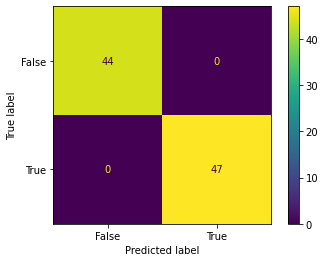

Confusion Matrix Tree for Entropy: 
 [[44  0]
 [ 0 47]] 



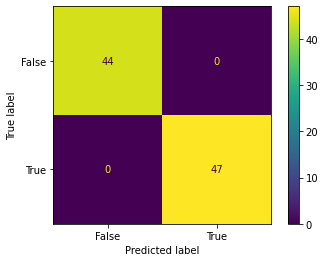

In [74]:
#Gini:
giniMatrix =  confusion_matrix(y_test, Y_pred2)
print("Confusion Matrix Tree for Gini: \n", giniMatrix,"\n")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = giniMatrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#Entropy:
entropyMatrix =  confusion_matrix(y_test, Y_pred)
print("Confusion Matrix Tree for Entropy: \n",entropyMatrix,"\n")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = entropyMatrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Part 2 : Let's add maximum depth!

Define an array of different maximum depths

In [25]:
max_depths = [] # FILL THIS LIST WITH DESIRED VALUES
accuracy_scores = []

for max_depth in max_depths:
    dt = DecisionTree(criterion='entropy',max_depth=max_depth) # Feel free to change the "entropy" to the "gini"
    
    # FIT declared tree to the train set and predict values on the test set. then calcualte accuracy score on the test set
    # Feel free to use the sklearn moudle for calcualting accuracy score.
    
    accuracy_score = accuracy_score(y_test,y_pred)*100
    accuracy_scores.append(accuracy_score)

In [26]:
for depth, score in zip(max_depths, accuracy_scores):
    print(f"Depth : {depth}, Accuracy : {score}")

Now compare the accuracy score of decision trees with and without using the "max_depth" parameter and discuss the effects of limiting the maximum depth of decision trees.